In [2]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
import src.stlouisfed as fred
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [33]:
data_1 = fred.get_series_observation("UNRATE")
data_1.rename(columns={'lin': 'Close'}, inplace=True)

In [34]:
data_1 = data_1[data_1.index > '2001-01-01']

In [46]:
ticker_1 = "GC=F"
ticker_2 = "^GSPC"
ticker_3 = "CL=F"
period = "23y"
stock_1 = yf.Ticker(ticker_1.upper()).history(period=period).dropna()
stock_2 = yf.Ticker(ticker_2.upper()).history(period=period).dropna()
stock_3 = yf.Ticker(ticker_3.upper()).history(period=period).dropna()

In [28]:
stock_1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-03-26 00:00:00-05:00,261.90,261.90,261.90,261.90,0,0.00,0.00
2001-03-27 00:00:00-05:00,261.00,261.00,261.00,261.00,0,0.00,0.00
2001-03-28 00:00:00-05:00,259.70,259.70,259.70,259.70,22994,0.00,0.00
2001-03-29 00:00:00-05:00,259.70,260.40,258.20,258.80,5646,0.00,0.00
2001-03-30 00:00:00-05:00,258.80,259.30,256.60,257.90,2479,0.00,0.00
...,...,...,...,...,...,...,...
2024-03-20 00:00:00-04:00,"2,157.30","2,185.90","2,150.90","2,157.90",17,0.00,0.00
2024-03-21 00:00:00-04:00,"2,207.00","2,211.60","2,182.40","2,182.40",63,0.00,0.00
2024-03-22 00:00:00-04:00,"2,179.20","2,179.60","2,157.50","2,158.10",19,0.00,0.00


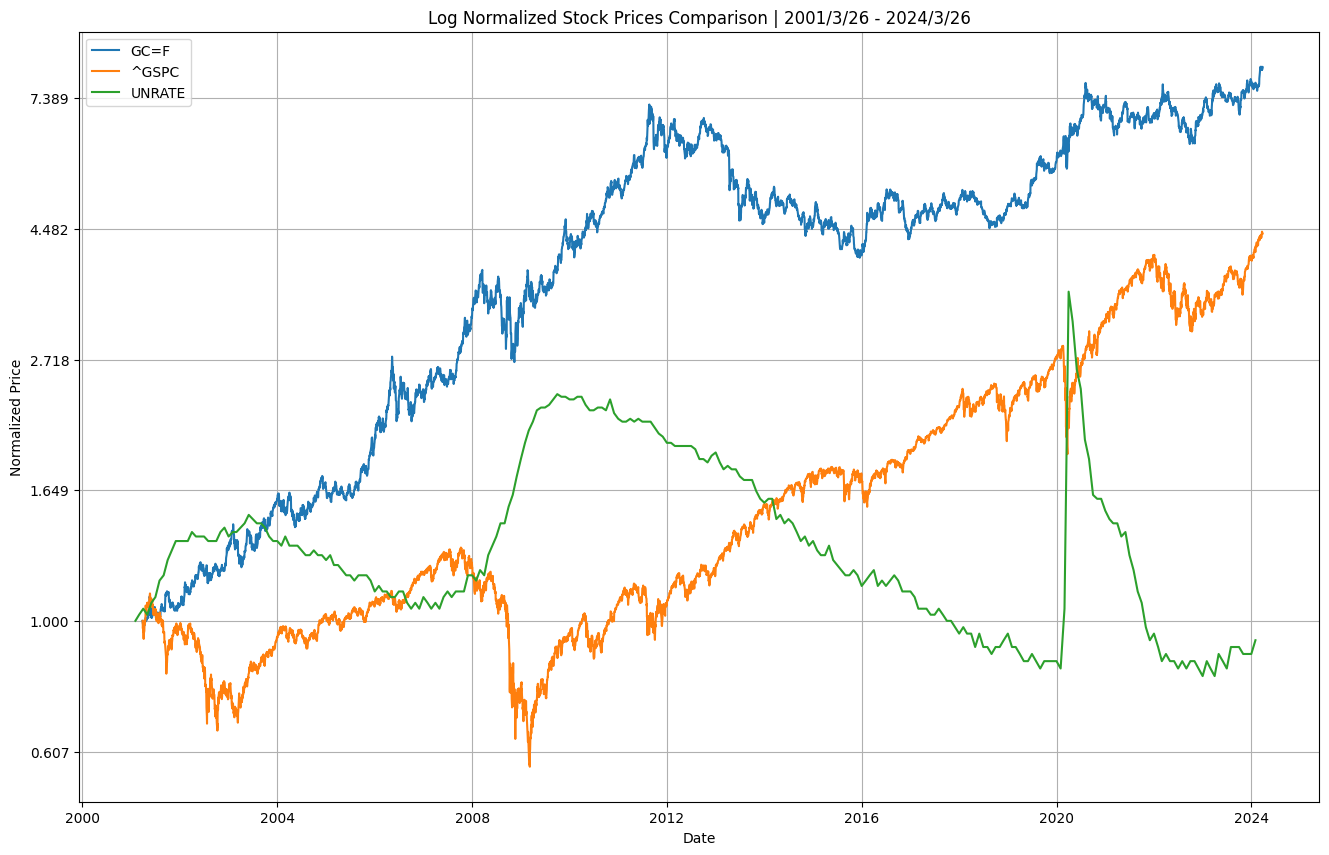

GC=F / ^GSPC correlation: 0.74816282


TypeError: Cannot join tz-naive with tz-aware DatetimeIndex

In [37]:
plotting.plot_n_chart_comparison([(ticker_1, stock_1), (ticker_2, stock_2), ("UNRATE", data_1)], log_scale=True)

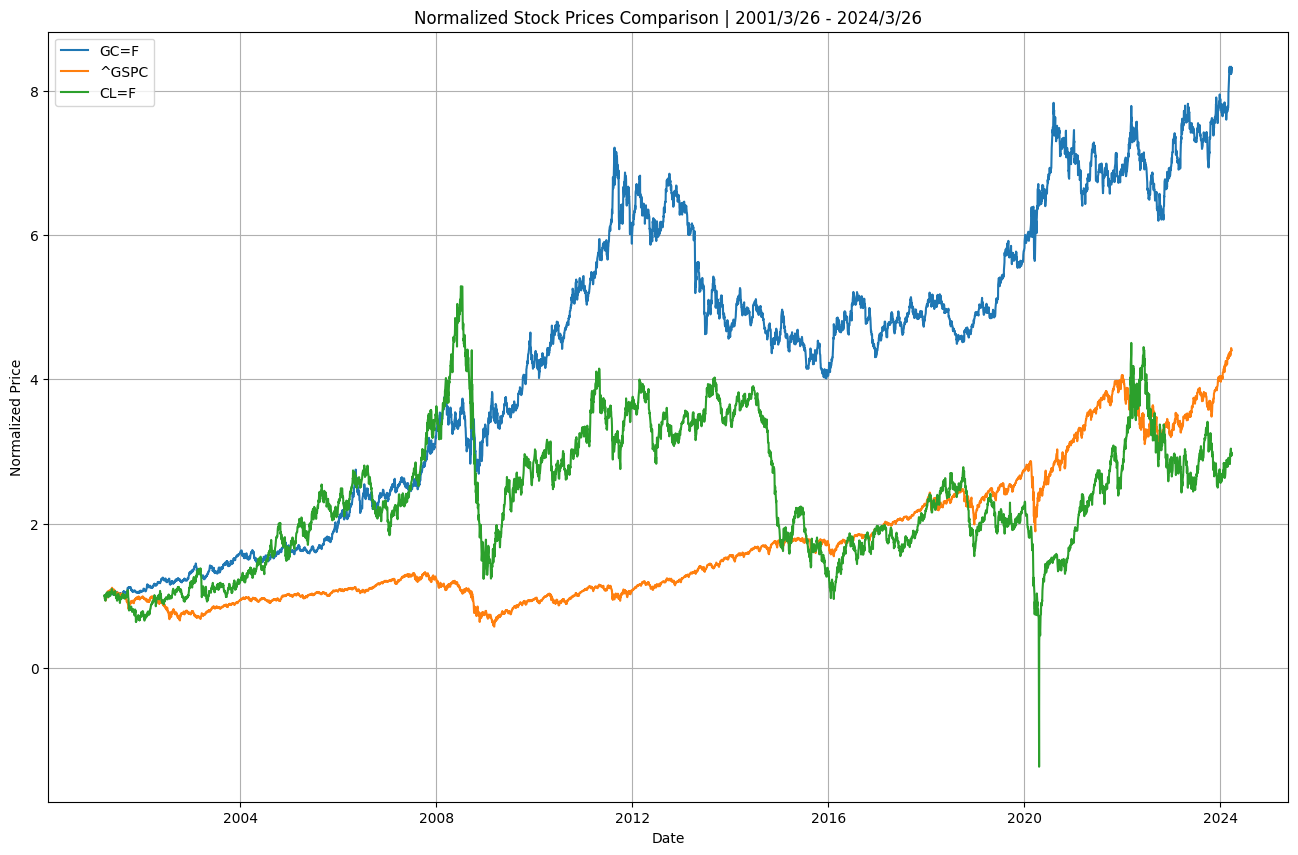

GC=F / ^GSPC correlation: 0.74816268
GC=F / CL=F correlation:  0.49931301
^GSPC / CL=F correlation: 0.15452673


In [47]:
plotting.plot_n_chart_comparison([(ticker_1, stock_1), (ticker_2, stock_2), (ticker_3, stock_3)], log_scale=False)